---
Zurück zur Übersicht | [Inhalt](00_Inhalt.ipynb)

---

In [1]:
# Für diese Notebook benötigte Pakete:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

# Messsignale, Charakterisierung und  Analyse

Bisher haben wir uns mit dem stationären Messungen einer physikalischen Größe befasst. Bis zu diesem Punkt sollte jedem bekannt sein was eine Kennlinie $y(x)$ ist und was die Sensitivität bedeutet. Außerdem haben wir uns mit Störungen und Unsicherheiten befasst, die während Messungen auftreten können und wie wir diese anhand von Fehlerabschätzungen und Fehlerfortpflanzungen abschätzen können. Außerdem sollte jede/r in der Lage eine Kurvenanpassung inkl. Fehlerbalken und Fehlerfortpflanzung auf gemessene Werte anwenden zu können.

## Inhalt
***

### [Messsignale](#Sec-Messsignale)
* [Wandlung von physikalischen Größen](#SubSec-Wandlung_von_physikalischen_Größen)
* [Beispiel: Radiowellen (bzw. elektromagnetische Wellen)]("SubSec-Beispiel_Radiowellen)
* [Wo steckt die Information?](#SubSec-Information)
* [Klassifizierung von Messsignalen](#SubSec-Klassifizierung_von_Messsignalen)
* [Digitalisierung von Messsignalen: Nyquist-Shannon-Abtasttheorem (Aliasing)](#SubSec-Nyquist-Shannon-Abtasttheorem)

### [Messsignale charakterisieren und analysieren](#Sec-Messsignale_charakterisierung)
* [Kenngrößen von Wechselgrößen](#SubSec-Kenngrößen)
    * [Beispiel von Kenngrößen für Sinusschwingung mit und ohne Gleichanteil](#SubsubSec-Kenngrößen_bsp_sinus)
    * [Beispiel von Kenngrößen für Pulsweitenmodulation](#SubsubSec-Kenngrößen_bsp_puls)
    
### [Fourrierreihen](#Sec-Fourierreihe)
* [Beispiel Fourierreihe eines Rechteckpuls](#SubSec-Bsp_Fourier_rechteck)

### [Fourier-Transformation](#Sec-FFFT)
* [Eigenschaften](#SubSec-Eigenschaften_FFT)
* [Anwendung](#SubSec-Anwendung_FFT)

### [Zusammenfassung](#Sec-Zusammenfassung)
***

## Messsignale <a id="Sec-Messsignale"></a>

Wir wissen also bereits, dass Messwerte die gesuchten Informationen über eine physikalische Größe beinhalten. Häufig findet die Übertragung dieser Information in Form eines Messsignals statt. Die Frage ist nun: Was ist denn überhaupt ein *Signal*? Dieser Begriff wird umgangssprachlich häufig mehrdeutig benutzt. In unserem Falle, also im technischen Gebrauch, sprechen wir von einem *Zeitverlauf* einer physikalischen Größe. Damit es eindeutig wird, wollen wir statt des Begriffs *Signal* einfach das Wort *Messsignal* einführen. Das bedeutet, dass ein Signal nicht an eine bestimmte physikalische Größe gebunden ist. Ein Signal besteht nämlich in der Regel aus mehreren Parametern (*Informationsparameter*), die die *Träger* von physikalischen Informationen sein können. Das einfachste Beispiel kann ein Messsignal in Form einer sinusförmigen Spannung sein, z.B.:

$$u(t) = A \cdot \sin(\omega t + \varphi)$$

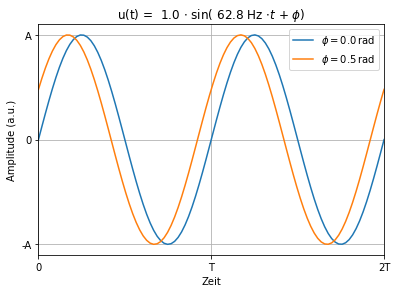

In [2]:
A = 1.0   # Amplitude
f = 10    # Frequenz in Hz
phi = 0.  # Phase in radian
T = 1/f   # Perdiodendauer
t = np.linspace(0,2*T,100) # Zeitwerte der Sinusfunktion in sec

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(t,A * np.sin(2*np.pi*f*t + phi), label = r'$\phi = 0.0\,\mathrm{rad}$')
ax.plot(t,A * np.sin(2*np.pi*f*t + 0.5), label = r'$\phi = 0.5\,\mathrm{rad}$')
ax.set_xlabel('Zeit')
ax.set_ylabel('Amplitude (a.u.)')
ax.set_xlim(0,2*T)
ax.set_xticks([0, T, 2*T])
ax.set_xticklabels(['0','T','2T'])
ax.set_yticks([-A, 0, A])
ax.set_yticklabels(['-A','0','A'])
ax.set_title(r'u(t) =%5.1f $\cdot$ sin(%5.1f Hz $\cdot t$ + $\phi$)' %(A, 2*np.pi*f))
ax.grid()
ax.legend()
plt.show()

Die Funktion hängt von drei Parametern ab:
* der Amplitude $A$
* der Frequenz $f$, bzw. Kreisfrequenz $\omega = 2\pi f$
* der Phase (Phasenwinkel) $\phi$

Je nach Aufgabe können wir das Messsignal auswerten indem wir entweder die Ampltiudeu messen, oder die Frequenz, oder den Phasenwinkel (oder alle zusammen). 

Vorteil der Nutzung von Messsignalen ist, das physikalische Größen mittels dieser Umwandlung relativ einfach übertragen und weiterverarbeitet werden können. Dies ist insbesondere für Steuer- oder Regelungsprozesse von besonderem Interesse. 

### Wandlung von physikalischen Größen <a id="SubSec-Wandlung_von_physikalischen_Größen"></a>

Schon bei sehr einfachen Messeinrichtungen erfolgt im Allgemeinen eine Wandlung desaus der Umwelt gewonnen Messsignals in einer für den Menschen interpretierbare, bzw. zur Weiterverarbeitung geeignete Signalform. Ganz wichtig ist hierbei, dass die Messinformation auf gar keinen Fall verändert werden darf. Bzw. wenn die Messinformation verändert werden sollte, dann sollte dies immer kontrolliert und bewusst geschehen, sodass die gewünschte Information immer noch zurück gewonnen werden kann. Dies ist in der Praxis aber wieder nur bedingt möglich. 

Wir können auf jeden Fall folgendes zusammenfassen, wenn wir die Wandlung einer physikalischen Größe betrachten:
* Jede physikalische Größe wird in der Regel in ein Signal umgewandelt, da die wenigsten Größen in der Natur *direkt* messbar sind.
* Selbst elektrische Spannungen müssen irgendwie angezeigt werden können:
    * Die Amplitude könnte beispielsweise über einen Zeigerausschlag transformiert werden. Hierfür kann ein *Elektroskop* benutzt werden, welches über die Spannung, bzw. Spannungsdifferenzen, aufgeladen wird. Gleichnamige Ladungen stoßen sich ab und es wird eine elektrostatische Kraft erzeugt: $F = q\cdot E$, wobei $q$ die Ladung und $E$ die Feldstärke ist. D.h. zunächst einmal kann das Elektroskop Ladungen messen. Da es sich aber wir ein Kondensator verhält (zwei voneinander isolierte Elektroden) können wir mittels $Q = CU$ auch Spannungen messen. $C$ ist hierbei die Kapazität des Kondensators (konstant).
    * Für die Temperatur könnte ein temperaturabhängiger Widerstand beutzt werden, der einen Spannungsabfall erzeugt. 

Für die Wandlung einer Signalform in eine andere sollte folgendes gelten:
* Die physikalische Größe der Informationsparamter darf nicht verändert werden, sie wird lediglich in eine neue Signalform umgewandelt.
* Beispiel: Ein Messverstärker, der eine Amplitude eines Messsignals für die Anzeige vorbereitet, wandelt eine *Amplitude* in eine *Amplitude*.

Zur Informationsübertragung werden häufig **elektromagnetische Wellen** oder **elektrische Signale** benutzt. In einigen Bereichen sind aber auch **mechanische**, **pneumatische** und **hydraulische** Signale üblich, vor allem wenn man sich technische Regeleinrichtungen ansieht, spielen die letztgenannten Signale eine wichtige Rolle. Die nachfolgenden Beschreibungen kann aber auch jede Art von Messsignal angewendet werden.

### Beispiel: Radiowellen (bzw. elektromagnetische Wellen) <a id="SubSec-Beispiel_Radiowellen"></a>
Ein Beispiel sind Radiowellen, welche bis zu 300 Millionen-mal pro Sekunde eine Schwingung ausführen (= 300 MHz). Je nach Frequenz, bzw. Wellenlänge, werden Radiowellen in Mittel-, Kurz- und Ultrakurzwellen klassifiziert. Deren Ausbreitungsgeschwindigkeit beträgt Lichtgeschwindigkeit (es sind ja elektromagnetische Wellen) und liegt somit bei 299.792.458 m/s (also ca. 300.000km/s). Die Wellenlänge kann mittels folgender Formel aus Freqnenz $f$ und Geschwindigkeit $c$ berechnet werden:

$$ \lambda = \frac{c}{f}$$

Die Wellenlängen von Radiowellen sind somit über 1m lang.

In [3]:
f = 300e6 # Frequenz in Hz
c = 299792458 # Lichtgeschwindigkeit in m/s
wellenlaenge = c/f
print('Die Wellenlänge einer Schwingung mit Frequenz f = %5.2f MHz beträgt %5.2f m' %(f/1e6,wellenlaenge))

Die Wellenlänge einer Schwingung mit Frequenz f = 300.00 MHz beträgt  1.00 m


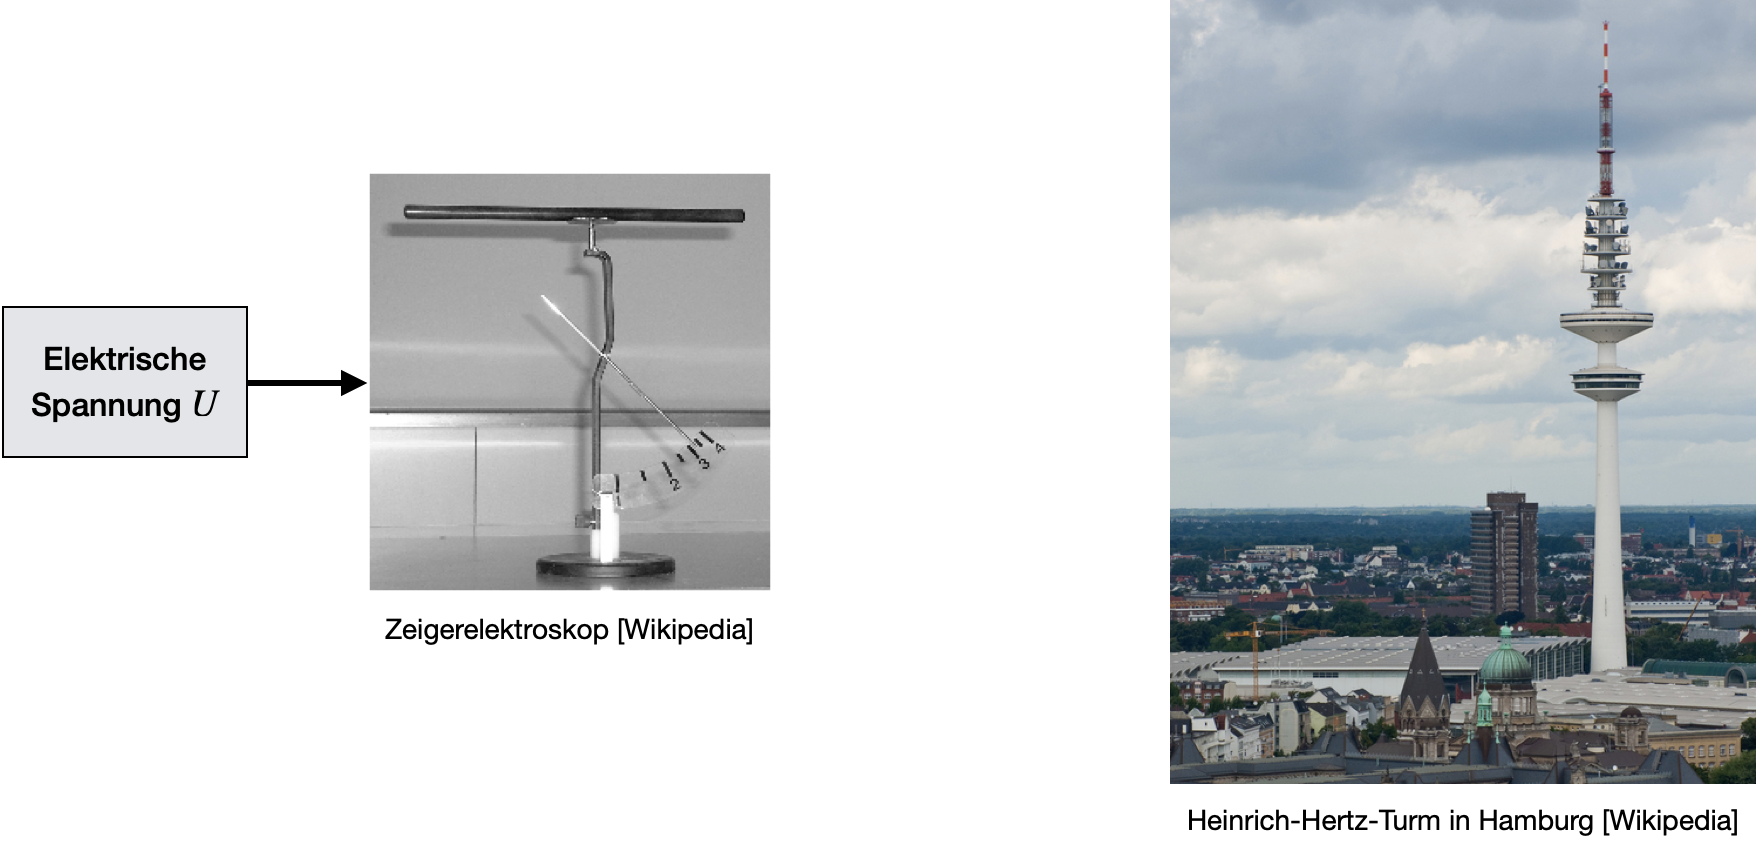

In [4]:
Image("pictures/messsignal_wandlung.png", width=600)

Da die Wellenlänge sehr groß ist, wird diese Art von Strahlung kaum durch Teilchen in unserer Atmosphäre oder Ionosphäre absorbiert und abgeschwächt, sondern tatsächlich reflektiert. Dadurch eignet sie sich hervorragend für die Signalübertragung von langen Distanzen. Die Ionosphäre agiert quasi als riesengroßer Spiegel für die Radiowelle, wodruch die Strahlung zurück zur Erde reflektiert wird. (Tatächlich wird dank Strahlung aus dem Weltall dafür gesrogt, dass Elektronen aus Atomen in der Ionosphäre gelöst werden. Dadruch bilden sich positiv geladene Atomreste, welche zusammen mit den freien Elektronen einen Spiegel für Radiowellen bilden.)

* Radiowellen mit Frequenzen **unter 30 MHz** können von der Ionosphäre vollständig reflektiert werden. Einige Telekommunikations- und Radarsysteme nutzen die reflektierenden Eigenschaften der Ionosphäre für Radiowellen unterhalb von etwa 30 MHz zur Überbrückung großer Entfernungen.
* Radiowellen mit Frequenzen **oberhalb von 30 MHz** können die Ionosphäre durchdringen, so dass eine Kommunikation mit Satelliten möglich wird.  (Die Radiowellen regen die freien Elektronen zum Schwingen an, wodurch ein Dipolstrahler entsteht. Dieser erzeugt Strahlung mit einer Phasenverschiebung, aber der gleichen Frequenz. Als Resultat sieht es so aus, als würde die einfallende Strahlung von Erde vom Lot webgebrochen werden (Die Ionosphäre ist also ein optisch dünneres Medium. Je steiler der Einfallswinkel (oder je höher die Frequenz), umso tiefer dringt die Radiowelle in die ionisierte Schicht ein. 
* Selbst im **GHz-Bereich** macht sich ein Brechungseinfluss noch störend bemerkbar, wodurch Messfehler bei der Satellitennavigation entstehen.

Die Reichweite von Signale zur Übertragung von Informationen hängt also von der Wellenlänge bzw. Frequenz der Strahlung ab und den Umgebungsparametern (wie z.B. die Ionosphäre). Weitere  elektromagnetische Wellen, welche gerne zur Signaleübertragung benutzt werden, sind z.B.:
* Funkwellen (~1m - ~1km)
* Mikrowellen (~1mm - ~1m)
* Infrarot-Strahlung (~1um - ~1mm)
* UV-Strahlung (~100nm - ~390nm)
* Röntgenstrahlung (~30pm - ~1nm)

Das sichtbare Licht, ebenfalls eine elektromagnetische Welle, ist nur in einem verhältnismäßig kleinem Bereich zu finden.~

Es gilt allgemein, je kleiner die Wellenlänge, desto höher die Frequenz, desto höher ist die Energie, die transportiert wird:

$$E = h \cdot f $$

mit $h = 6.626\cdot 10^{-34}\,\mathrm{Js}$ dem Planck'schen Wirkungsquantum.

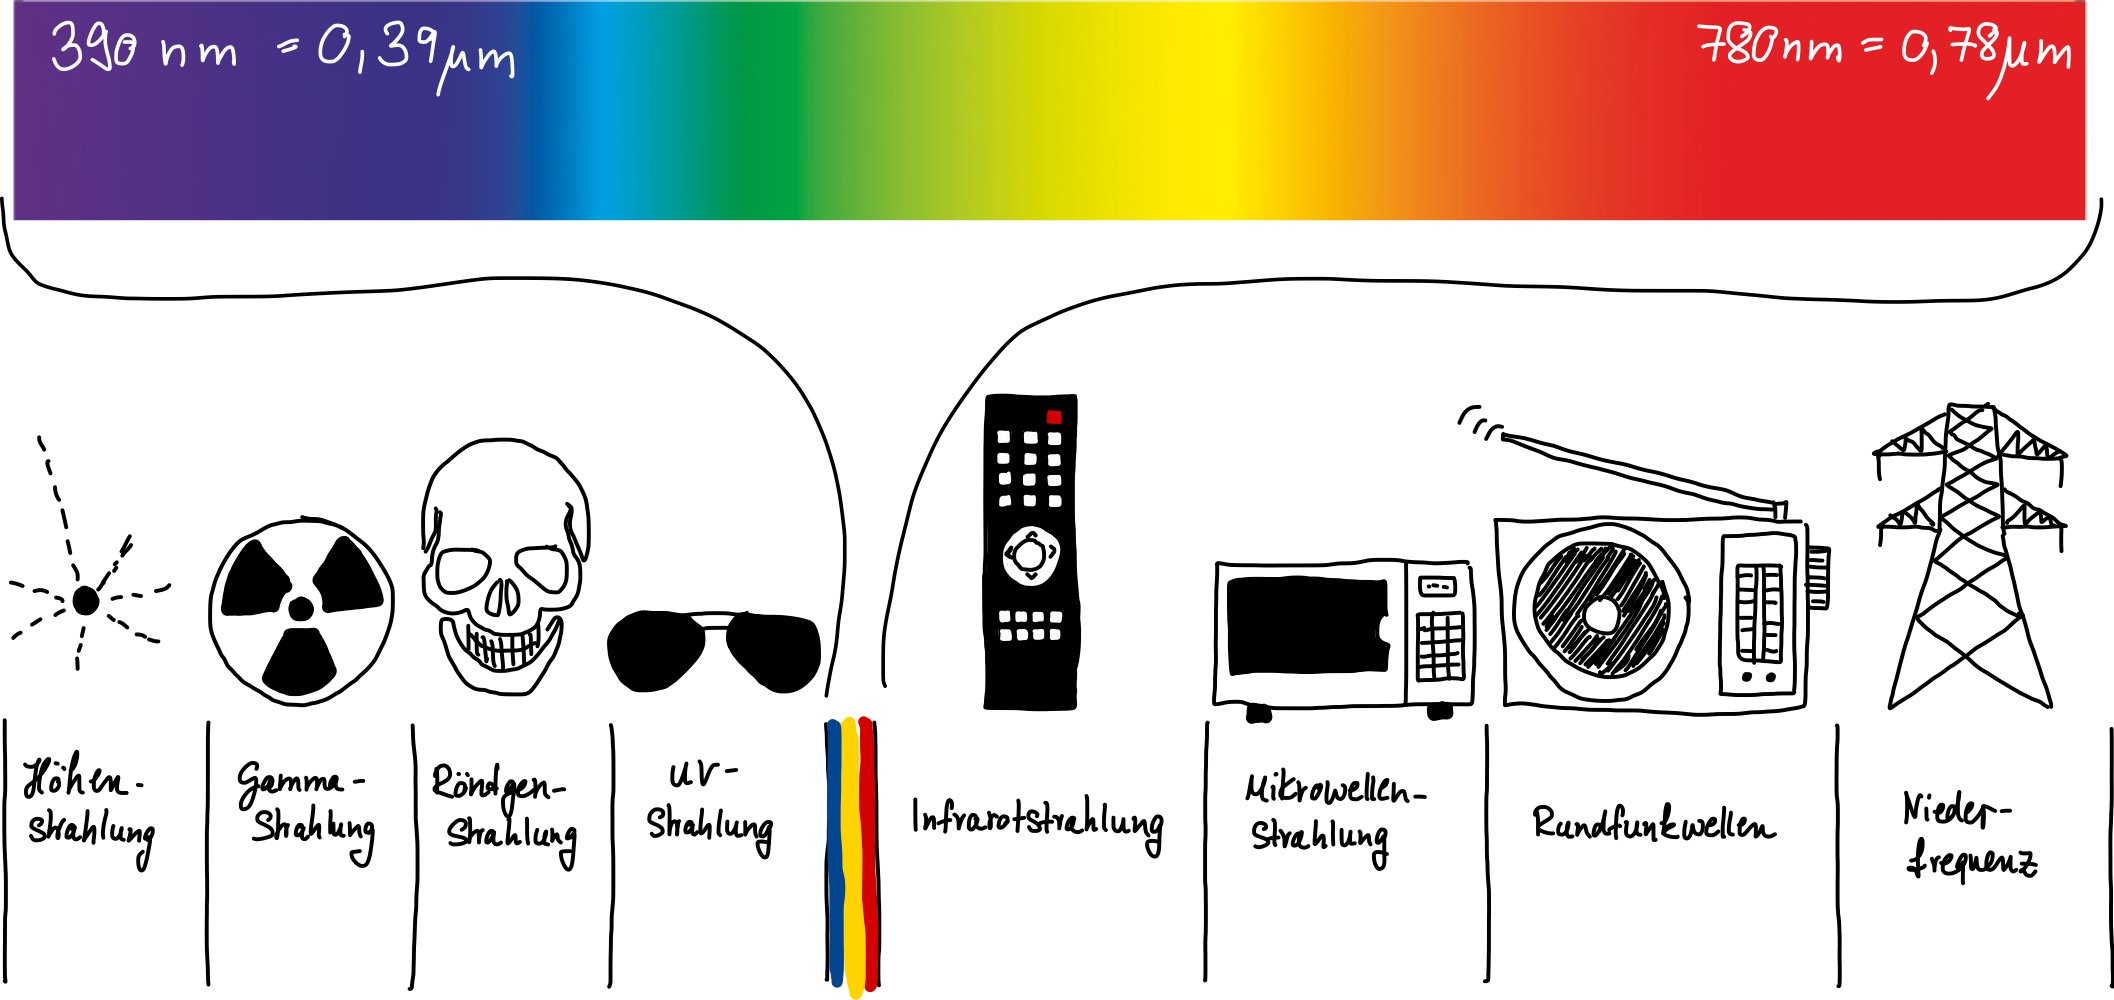

In [5]:
Image("pictures/EM_spectrum.png", width=800)

#### Exkurs: Funkwellen in der Ionosphäre <a id="SubSubSec-Exkurs"></a>

Radiowellen unterschiedlicher Frequenz und Einfallswinkel werden an der Ionosphäre reflektiert und auf die Erde zurück geworden, oder durchgelassen, wodruch Satellitenkommunikation ermöglich wird. Ob und wie Funkwellen reflektiert werden, hängt von der Dichte und Höhe der Ionosphärenschicht ab, und von der Frequenz der einfallenden Funkwelle. 

Durch Sonneneinstrahlung im ultravioletten Bereich werden Elektronen in der Ionosphäre von ihren Luftatomen getrennt. Dadurch entstehen freie Elektronen und postiv geladene Ionenrümpfe bleiben zurück. Je stärker die Sonneneinstrahlung (je mehr UV-Lichtteilchen), desto mehr Elektronen frei gesetzt und die Elektronendichte, $N_e$, steigt an. 

* 0-90km: hier gibt es keine freien Elektronen, keine Ionosphäre!
* 50-90km: D_Schicht: keine Bedeutung für unsere Funkwellen (sie existiert auch nur am Tag wenn die Sonneneinstrahlung am stärksten ist
* ~100km: E-Schicht
* ~200km: F1-Schicht
* 250-400km: F2-Schicht: größte Elektronen-/Ionendichte mit etwa $N_e =$ 1 Million/cm$^3$ freie Elektronen
* noch höher: Luftmoleküle werden seltener, wodruch die Elektronendichte trotz stärkerer Strahlung wieder abnimmt 

Ionosphäre ist tagüber, bei maximaler Sonneneinstrahlung, am stärksten mit freien Elektronen versetzt. Nachts nimmt die  Ionosphäre ab, da sich die freien Elektronen wieder mit den Ionen verbinden. Dies dauert je nach Höhe der Schicht unterschiedlich lang. Die F2-Schicht beispielsweise ist auch nachts noch so stark ausgeprägt, dass sie zur Übertragung von Funkwellen benutzt werden kann. 

Wenn Funkwellen in die Ionosphäre eintreten, ändern sie ihre Richtung, ähnlich wie Lichtstrahlen an einem Prisma. Niederigere Frequenzen brechen sich hierbei leichter, also hohe Frequenzen. Schräge Wellen berechen sich leichter als senkrecht eintreffende Strahlen. 

Das Verhalten von Funkwellen beim Auftreffen auf freie Elektronen kann mittels Plasmatheorie beschrieben werden. In einem Plasma treten lokal verdichtete Bereiche von freien Elektronen auf. Das sogenannten Elektronengas. An diesen Stellen ist die Dichte der Elektronen so hoch, dass die Coulombkraft abstoßend zwischen den Elektronen in Vorschein tritt. Dadurch werden die Elektronen wieder auseinander getrieben. Aufgrund der Trägheit der Elektronen treten hierdurch allerdings an anderen Stellen wieder lokale Verdichtungen auf und der Effekt wiederholt sich. Dieses Hin und Her von lokalen Ladungsüberschussen resultiert in eine periodische Schwingung, die sogenannte Plasmafrequenz, mit der die Elektronendichte um ihre mittlere Dichte oszilliert:

$$f_p = \frac{1}{2\pi}\sqrt{\frac{N_e e^2}{\epsilon_e m_e}} \approx 8,978\,\mathrm{Hz} \cdot \sqrt{\frac{N_e}{\mathrm{m^3}}}$$

Hier ist $\epsilon_0 = 8,854\cdot 10^{-12}\,\mathrm{\frac{As}{Vm}}$ die elektrische Feldkonstante, $N_e$ die Elektronendichte, $m_e$ die Elektronenmasse, $e = 1,602\cdot 10^{-19}\,\mathrm{C}$ die Elementarladung. Abhängig von der Höhe haben wir in der Ionosphäre unterschiedliche Elektronendichten und können folgende Plasmafrequenzen berechnen:
* 100km Höhe: $f_p = 1,5\,\mathrm{MHz}$
* 800km Höhe: $f_p = 7\,\mathrm{MHz}$

Der Brechungsindex $n$ der Ionosphäre lässt sich mittels folgender Formel berechnen: 

$$n = \sqrt{1- \frac{f_p^2}{f^2}}$$

Hierbei wurde die Zyklotronfrequenz der Elektronen, die durch das Magnetfeld der Erde  hervorgerufen wird, vernachlässigt. Unter Berücksichtung der Kreisbewegung der Elektronen um die Feldlinien im Erdmagnetfeld würde ansonsten ein zusätzlicher Frequenzterm von etwa 1,3MHz zu der Gleichung hinzugefügt werden und je nach Polrisation der einfallenden Funkwelle (links-zirkular oder recht-zirkular) würden sich leicht unterschiedliche Brechungsindizies ergeben, abhängig davon, ob die Drehrichtung mit der Elektronenbewegung übereinstimmt.

Anhang dieser Formel sind zwei Fälle zu berücksichtigen:

* $f < f_p$: der Brechungsindex wird imaginär. D.h. es findet vollständige Reflektion statt und Lang- und Mittelwellen kommen wieder zurück zur Erden
* $f > f_p$: der Brechungsindex ist real. D.h. die Funkwellen können die Schicht durchdringen (bei senkrechtem Einfall der Strahlung)

Das bedeutet für unsere beiden Fälle von oben, dass unter senkrechtem Einfall:
* in 100km Höhe Funkwellen mit einer Frequenz von <1,5MHz vollständig reflektiert werden. Wellen höherer Frequenz können diese Ionosphärenschicht durchdringen.
* in 800km Höhe Funkwellen mit einer Frequenz von <7,0MHz vollständig reflektiert werden. Wellen höherer Frequenz können diese Ionosphärenschicht durchdringen. 
* Funkwellen mit Frequenzen >7MHz werden die Erde nicht wieder erreichen.

Die Plasmafrequenz ist in dieser Annäherung also die kritische Frequenz, bis zu welcher Funkwellen unter einem senkrechtem Einfallswinkel, vollständig reflektiert werden. 

Desweiteren wird beobachtet, dass die Durchlässigkeit der Ionosphäre für Funkwellen vom Eintreffwinkel abhängt und näherungsweise über folgende Formel beschrieben werden kann:

$$f_\mathrm{MUF} \approx \frac{f_\mathrm{krit}}{\sin(\alpha)} = f_\mathrm{krit} \cdot \sqrt{1 + \left(\frac{d}{2 h_\mathrm{krit}}\right)^2}$$

wobei $\alpha$ der Winkel ist, der die Strahlung zum Horizont bildet, $f_\mathrm{krit}$ die kritische Frequenz ist, unter welcher die Strahlung vollständig reflektiert werden würde, $d$ ist die Entfernung zwischen Sender und Empfänger und $h_\mathrm{krit}$ die virtuelle Höhe der Reflektion. Hier ist $f_\mathrm{MUF}$ die **Grenzfrequenz** der Funkwelle, welche gerade noch von der Schicht reflektiert wird. MUF steht hierbei für *maximum usable frequency*. Analog gibt es auch die LUF-Frequenz, die *lowest usable frequency*. 

### Wo steckt die Information? <a id="SubSec-Information"></a>

Im ersten Abschnitt haben wir schon angedeutet, dass nicht nur physikalische Größen in Messsignale umgewandelt werden, sondern auch Signale in andere Signalformen. Sehr häufiges Beispiel aus der Messtechnik ist der Informationsparameter Amplitude der in Frequenz umgewandelt wird. Dies hat den einfachen Grund, dass die Frequenz eines Messsignals extrem unempfindlich gegenüber Störeinflüssen aus der Umgebung ist. Eine Amplitude wird viel schneller verfälscht, oder abgeschwächt, als die Frequenz. Ein weiterer Vorteil ist, dass die Frequenz eines Messsignals sehr einfach digitalisiert werden kann, wodurch auch die physikalische Größe schnell digital zur Verfügung steht. Man könnte beispielsweise eine einfache Triggereinrichtung nutzen, welche die Frequenz eines Messsignals in Pulse umwandelt, die mit einer bestimmten Wiederholrate (also mit der Frequenz des Signals) zur Verfügung gestellt werden. Diese Pulse werden dann innerhalb eines definierten Zeitfenster ausgezählt. Mit solchen *Frequenzzählern* werden wir uns später noch ausführlicher beschäftigen. Für solch eine Art von Messsignal wird eine **Modulation** des Messsignals benötigt, welche die physikalische Größe auf den Träger, in diesem Fall die Frequenz, aufbringt. 

Klassischerweise benutzt man eine sinusförmige Schwingung konstanter Frequent und Amplitude als **Trägerschwingung**. Durch die Modulation können folgende Parameter der Trägerschwingung beeinflusst werden:
* die Amplitude. Dies ist bekannt als Amplitudenmodulation (AM)
* die Frequenz. Dies ist bekannt als Frequenzmodulation (FM)
* die Phase. Hierbei wird der Nullphasenwinkel verschoben. Dies ist bekannt als Phasenmodulation (PM)

Im Anschluss muss mittels **Demodulation** der originale Zeitverlauf der physikalischen Größe zurückgewonnen werden. 

**Beispiel Nutzsignale**: Nutzsignale wie Sprache oder Musik können häufig nicht direkt über gewünschte Übertragungsmedien wie beispielsweise einen Funkkanal übertragen werden. Zur Übertragung muss das Nutzsignal in einen anderen Frequenzbereich verschoben werden, was beispielsweise durch eine AM geschehen kann. Durch das Verschieben können auch mehrere Nutzsignale gleichzeitig und ohne gegenseitige Störung übertragen werden.
Vom heutigen Stand der Technik betrachtet ist die AM allerdings überholt, weil die Qualitätsansprüche gestiegen sind und mit modernen Bauelementen die FM-Geräte erheblich einfacher, billiger und leistungssparender gebaut werden können. Außerdem haben die FM einen höheren Dynamikumfang des Informationssignals und ist weniger anfällig gegenüber Störungen.

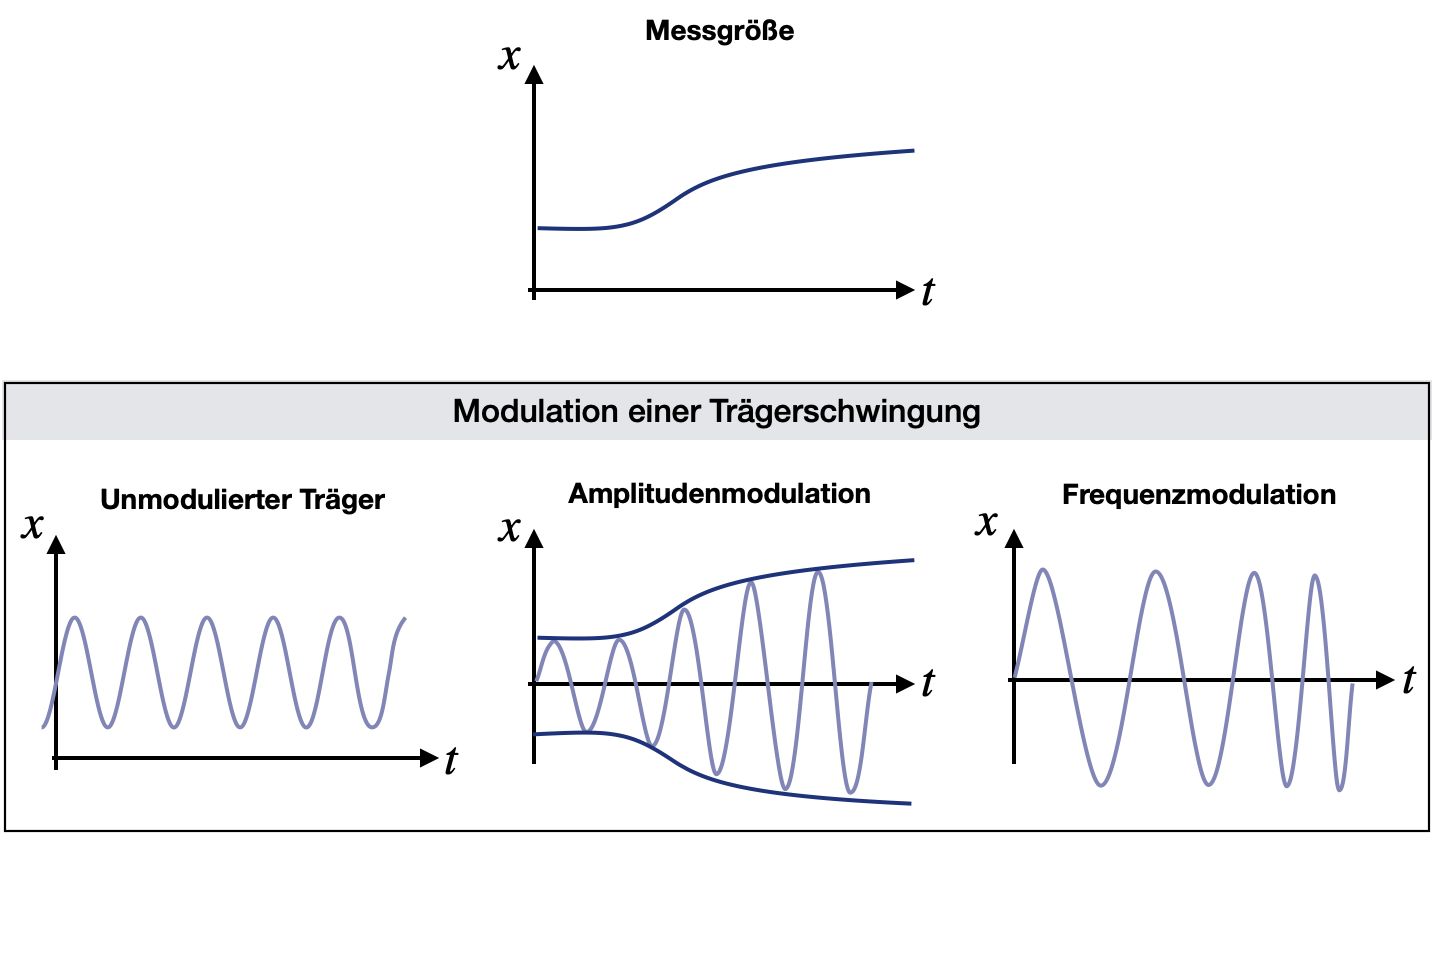

In [6]:
Image("pictures/AM_FM.png", width=700)

Häufig werden auch Rechteckpulsfolgen als Trägerschwingung verwendet. Ähnlich wie bei der Sinusschwingung können auch hier verschiedene Modulationen vorgenommen werden, die größtenteils selbsterklärend sind (wie Pulsamplitudenmodulation oder Pulsdauermodulation). Nur die Pulscode-Modulation ist etwas anders und besonders. Hierbei wird das Messsignal kodiert und besteht aus einer Folge von Pulsgruppen. Diese Aneinanderreihung von Pulsgruppen entspricht einem bestimmten Alphabet. Vorteil dieser Variante ist, dass nur noch zwei Zustände, nämlich 0 und 1, in einer bestimmten Reihenfolge verarbeitet werden müssen. D.h. diese Art von Signalen ist direkt im Computer weiterverarbeitbar, ohne vorangegangen Analog-Digital-Wandlung. 

Auch hier gilt natürlich, dass eine entsprechende Demodulation nachgeschaltet werden muss, um das eigentliche Signal zurück zu gewinnen. 

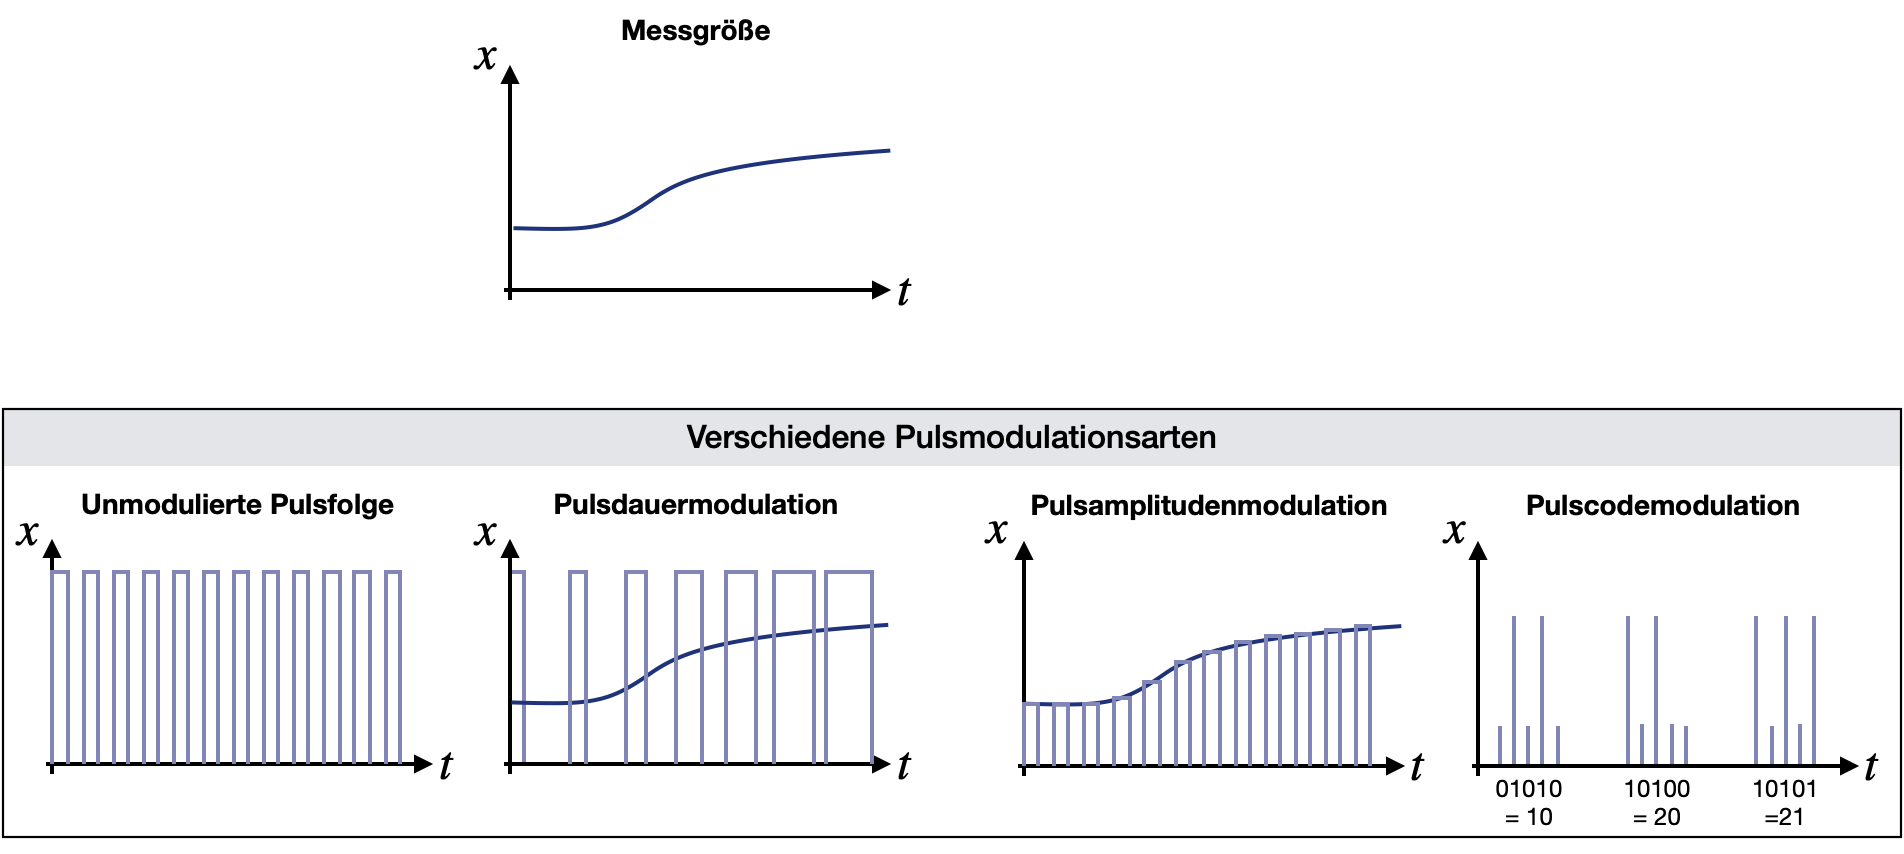

In [7]:
Image("pictures/puls_mod.png", width=700)

### Klassifizierung von Messsignalen <a id="SubSec-Klassifizierung_von_Messsignalen"></a>

Für eine ausreichende Charakterisierung von Messsignalen werden diese noch nach dem Wertevorrat der Informationsparameter (analog oder diskret) und dem zeitlichen Auftreten (kontinuierlich oder diskontinuierlich/diskret) unterschieden. Oft kommt dazu noch eine weitere Signalart, nämlich *stochastische* Signale, auch bekannt als *Rauschen*, bei welchem die Werte zufallsbehaftet sind. In diesem Fall können erst bei einer großen Anzahl von Ereignissen gesicherte Aussagen über die Qualität einer Messung geliefert werden (damit haben wir uns ja schon innerhalb der Messunsicherheiten und der Statistik befasst). 
Determinierte Signale liefern hingegen zu jedem Zeitpunkt einen festen Zusammenhang zwischen zu analysierenden und den erhaltenene Messwerten. Allgemein finden wir in technischen Messsystemen eigentlich immer deterministische Signale. Das heißt es gilt Determiniertheit.

Das folgende Bild zeigt, wie der Wertevorrat und deren zeitliche Verfügbarkeit aussehen könnte. Hierbei können kontinuierliche und diskrete sowohl im Wertebereich, also auch im Zeitbereich, kombiniert werden.

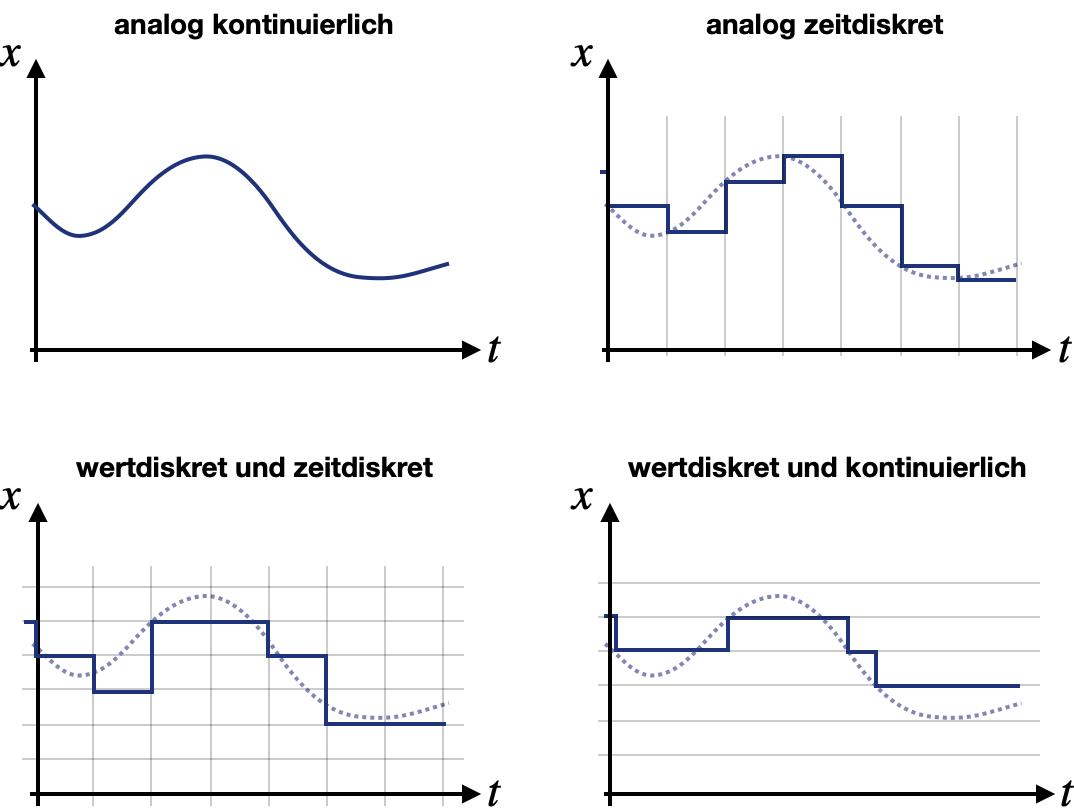

In [8]:
Image("pictures/messsignal_analog_diskret.png", width=600)

Folgende Klassifizierungen von Messsignalen existieren:
* **analog**: Der Wertebereich (also die Werte auf der y-Achse) ist kontinuierlich. Theoretisch kann der Informationsparameter $y$ jeden beliebigen Wert innerhalb seines Wertebereichs annehmen. Dadurch erhält man eine proportional Abbildung zwischen Messsignal und Parameter. Allerdings ist dieses System sehr störanfällig und reagiert auf Störsignale, Rauschen oder Temperaturdrifts. 
* **diskret (wertdiskret)**: Diskret kann man sowohl der Werte- als auch den Zeitbereich bezeichnen. Für die Eindeutigkeit können wir den Begriff wertdiskret benutzen. Hierbei kann der Informationsparameter nur endlich viele Werte annehmen und wird nicht mehr vollständig proportional abgebildet. Dadurch ist das System zwar etwas weniger empfindlich gegenüber Störeinflüssen (erst nach Überschreiten von Grenzwerten wird der nächste *diskrete* Messwert angezeigt), doch bei der Abbildung analoger Messwerte auf einen diskreten Informationsparameter gehen Informationen verloren. 
* **kontinuierlich**: Dies ist das Analogon auf der Zeitachse zum *analogen* Wertebereich. Kontinuierliche Messwerte bedeutet, dass die Informationparameter zu jedem beliebigen *Zeitpunkt* seinen Wert ändern kann. D.h. der zeitliche Verlauf ist immer verfolgbar, jedoch können auch hier Störungen einwirken, und zwar jederzeit, die die Messung beeinflussen. Außerdem wird die Datenmenge oft unnötig groß.
* **diskontinuierlich (zeitdiskret)**: Nun befassen wir uns mit diskreten Messwerten im Zeitbereich. Dies nennt zur Unterscheidung auch diskontinuierlich. Hierbei stehen Informationsparameter nur zu bestimmten Zeitpunkten zur Verfügung, wodurch Störungen, die zwischen zwei Zeitpunkten wirken, keine Rolle mehr spielen. Nachteil ist jedoch, dass die Informationen nur noch zu bestimmten Zeitpunkten zur Verfügung stehen.
* **stochastisch**: Jetzt steckt der Informationsparameter in einer stochastischen Größe, also im Rauschen. Da Störungen häufig eine charakteristische Verteilung haben, sind diese, wenn überhaupt, nur stark reduziert bemerkbar. Sie werden quasi über die Messzeit hinweg mitgemessen, integrieren sich auf, und können weggemittelt werden (Mittelwert ist häufig bei Null). Nachteil dieses Verfahrens ist, dass die Information erst nach mehrmaligen Messungen zur Verfügung steht, was einen großen Zeitbereich benötigen kann.
* **determiniert**: Im Unterschied zu stochastischen Signalen kann hier die Information mit nur einer einmaligen Messung gewonnen werden. Nachteil ist, dass diese einmalige Messung durch Störungen unbrauchbar gemacht werden können. 

Bei *digitalen* Signalen sind die diskreten Werte einem bestimmten Alphabet zugeordnet. Im *binären* System kann der Informationsparameter dann nur noch zwei Werte annehmen. 

Beispiele zum obigen Bild sind:
* **analog kontinuierlich**: Manometer am Druckkessel, Aufgesetzte Messuhr (Wärmeausdehnung), Analoge Spannungs- oder Strommessung
* **analog zeitdiskret**: Abgetastetes System. Informationen gehen verloren.
* **wertdiskret und kontinuierlich**: Lagerbestand (Es können nur ganze Bauelemente dem Lager entnommen werden, sodass der Lagerbestand wertediskret ist. Es ist aber zu jedem Zeitpunkt bekannt, wie viele Bauelemente eines bestimmten Typs vorhanden sind. Das Signal ist zeitkontinuierlich.)
* **wertdiskret und zeitdiskret**: Digitalisierung

Nur bei analogen kontinuierlichen Signalen sind informationsverlustfreie Signalübertragungen möglich. 

### Digitalisierung von Messsignalen: Nyquist-Shannon-Abtasttheorem (Aliasing) <a id="SubSec-Nyquist-Shannon-Abtasttheorem"></a>

Oft liegen in der Messtechnik analoge Signale vor, welche mittels Analog-Digital-Wandler (ADW) *digitalisiert* werden. Analog bedeutet, dass das Signal einen unendlich großen Wertevorrat aufweist, wobei die Werte unendlich viele Ziffern haben. Solche Elemente sind in der digitalen Welt nicht darstellbar. Ein Rechner, egal wie gut, wird nur in der Lage sein endliche Speicherstellen zur Verfügung zu stellen. Der unendliche Wertevorrat der analogen Größe wird auf einen endlichen Wertevorrat von Teilbereichen (Quanten) abgebildet. Dies wird durch einen AWD erreicht und geht immer mit einem Informationsverlust einher (siehe [Stationäre Messsysteme](Messsysteme.ipynb), wo wir bereits die Digitalisierungskennlinie besprochen haben). Zur Erinnerung noch mal:

Der diskrete Wertebereich kann wiefolgt angegeben werden:

$$W_B = (2^n-1) \cdot 1\,\mathrm{LSB}$$

Aufgrund des begrenzten (diskreten) Wertebereichs ergibt sich eine absolute Messabweichung infolge der Quantisierung, die oft als absoluter Quantisierungsfehler bezeichnet wird. Diese bildet sich aus der Differenz zwischen dem digitalen Ist-Wert und dem idealisierten Kennenlinienwert (linear verlaufende ideale Kennlinie, im Bild blau gekennzeichnet). 

Die maximale Abweichung beträgt hier 1LSB, wodruch die relative Messabweichung, bezogen auf den Wertebereich, wiefolgt abgeschätzt werden kann:

$$A_\mathrm{rel} = \frac{A_\mathrm{max}}{W_B} = \frac{1\,\mathrm{LSB}}{(2^n-1)\cdot 1\,\mathrm{LSB}} \approx \frac{1}{2^n}$$

Jeder ADW benötigt für die Wandlung eines analogen Signals in ein digitales eine bestimmte Zeit und reagiert relativ spät. Diese Zeit ist endlich und kann nicht beliebig klein werden. Aus dem kontinuierlichen, analogen Signal wird also nur eine Schnittmenge von Messwerten entnommen zu bestimmten Zeitpunkten. Was zwischen zwei Zeitpunkte (Samples) mit dem analogen Signal passiert, wird nicht mitaufgezeichnet. Diese Zeitdiskretisierung muss allerdings nicht zwangsläufig mit einem Informationsverlust einhergehen. 

Unter bestimmten Voraussetzungen, die im Abtasttheorem festgelegt sind, kann man die Signalwerte zwischen den festen Abtastzeitpunkten wieder vollständig rekonstruieren. Das Shannon'sche Abtasttheorem gibt an, wie oft eine Sinusschwingung mit Frequenz $f$ abgetastet werden muss, damit sie aus dem digitalisieren Signal extrahiert werden kann:

$$f_\mathrm{ab} > 2f$$

Eine Schwingung muss innerhalb einer Periode mindestens 2-mal abgetastet werden. 
Nur wenn diese Bedingung erfüllt ist, entstehen durch die Abtastung keine Signalfehler.
Diese Bedingung ist ebenfalls auf beliebe periodische Signale anwendbar. Hierbei betrachtet man die höchste Frequenz, die noch in dem Signal vorkommt, und wählt entsprechend die *Nyquist*-Frequenz. 

Bestimmte Signale, wie z.B. Rechteckpulse oder Einzelpulse, haben eine unendlich hohe Flanke. Mathematisch werden wir im nächsten Kapitel dieser Vorlesung noch sehen, dass das bedeutet, dass deren Frequenzanteile bis ins Unendliche gehen. Das heißt eine Rechteckspannung hat unendliche hohe Frequenzen. Diese können durch Digitalisierung *nicht* mehr berücksichtigt werden, da keine Abtastfrequenzen von $2\cdot \infty$, also Zeitintervallen von 0 Sekunden, erreichbar sind. In diesem Falle findet ein Informationsverlust statt. 

Andersherum kann man analysieren, welche Art von Signalen mit bestimmten ADWs noch analysiert werden können. Hat mein Messsystem eine Abtastfrequenz (auch Sampling-Frequenz oder Bandbreite genannt) von $f_\mathrm{ab} = 100\,\mathrm{MHz}$, so können nur Signale mit Frequenzanteilen bis zu $f = 50\,\mathrm{MHz}$ verlustfrei analysiert werden. 

Außerdem sollte man als Messtechniker:in stets vermeiden, dass höhere Frequenzen als diese Grenzfrequenz in den ADW gelangen. 
Dadurch können nämlich hässliche Effekte entstehen, die Mehrdeutigkeiten des gewonnenen Ausgangssignals zulassen. Diesen Effekt nennt man auch **Aliasing**. Angenommen man speist hohe Frequenzen in einen ADW ein, für die der ADW nicht mehr ausgelegt ist. Dies hat zu Folge, dass die Kurve nicht mehr mit mehr als 2 Punkten innerhalb einer Periode abgetastet wird (Nyquist-Shannon ist nicht erfüllt). Dadurch kann der ursprüngliche Kurvenverlauf nicht reproduziert werden. Man erhält irgendeinen anderen Kurvenverlauf (siehe Bild), der keinerlei Rückschlüsse auf den wahren Verlauf aufweist. 
Um diese Effekte zu vermeiden, werden Filter, so genannten *Anti-Aliasing-Filter* verwendet. Diese sind im Prinzip nur sehr steilflankige Tiefpass-Filter, welche Signalanteile bei hohen Frequenzen (> $f_\mathrm{ab}/2$) rausfiltern und unterdrücken. 
Das Signal sollte hierbei allerdings möglichst nicht in seinem Frequenzverlauf beeinflusst oder gestört werden, weshalb man bei dem Filterdesign sehr sorgfältig vorgehen muss. 

Im Bild sieht man das Beispiel für 2,6 Abtastungen pro Periode (oben links), 1,4 Abtastungen (oben rechts), 2 Abtastungen (unten links) und 0,8 Abtastungen (unten rechts). Abtastungenspunkte, die 2 pro Periode unterschreiten, zeigen eine falsch-rekonstruierte Wellenform auf, was durch die rot gestrichelte Linie verdeutlicht werden soll. 

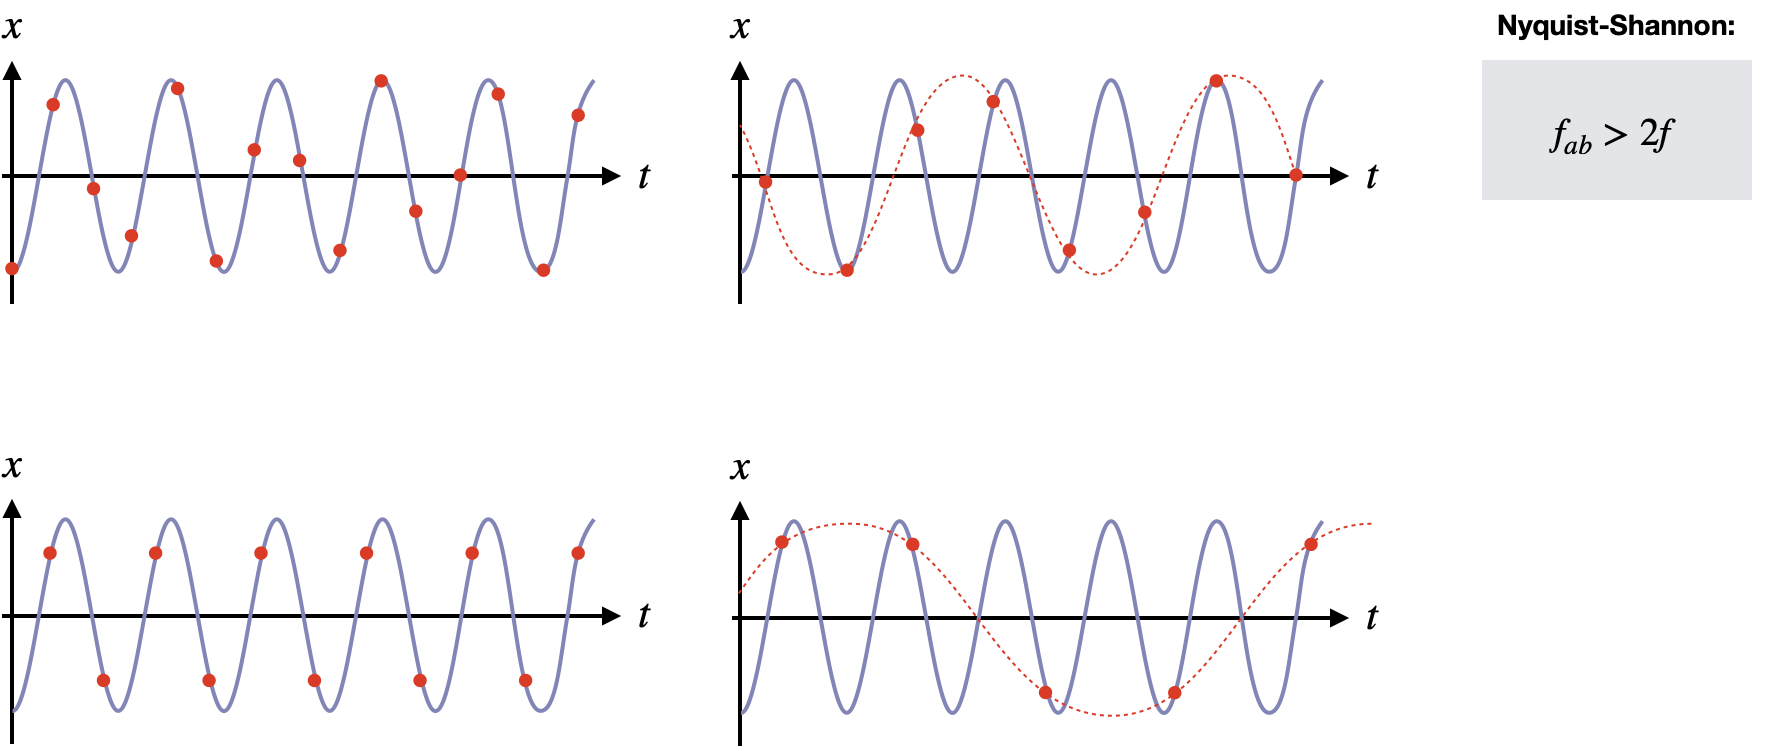

In [9]:
Image("pictures/aliasing.png", width=800)

## Messsignale charakterisieren und analysieren
<a id="Sec-Messsignale_charakterisierung"></a>

Eine Wechselgröße, z.B. eine Wechselspannung, liegt in der allgemein Form als Sinusschwingung vor. Die Form wollen wir im folgenden wiefolgt bescheiben:
$$u(t) = \hat U \cdot \sin(\omega t)$$

In elektronischen Schaltungen hat man dazu eine Stromstärke, der dieser Wechselspannung zugehörig ist, und sich allgemein wiefolgt schreiben lässt:

$$i(t) = \hat I \cdot \sin(\omega t + \varphi)$$

Der Stromstärke haben wir die Phase $\varphi$ hinzugefügt, da durch besondere Komponenten in der Schaltung, wie z.B. ein Kondensator oder eine Spule, eine Verzögerung zwischen Spannung und Stromstärke auftritt. Im klassischen Stromkreis, mit lediglich einem Widerstand, ist so eine Verzögerung meist vernachlässigbar. 

* Mit $\omega = 2\pi f$ wird die **Kreisfrequenz** bezeichnet, welche ebenfalls die Einheit Hz hat. Genauso wie die Frequenz $f$.
* Die **Frequenz** $f = \frac{1}{T}$ ist der Kehrwert der **Periodendauer** $T$.
* Die **Phase** $\varphi$ gibt die Phasenverschiebung oder Verzögerung des Messsignals an 

### Kenngrößen von Wechselgrößen
<a id="SubSec-Kenngrößen"></a>

Bei einem Wechselsignal interessiert man sich häufig nicht für den Zeitverlauf, oder den einzelnen Wert zu einem bestimmten Zeitpunkt, den sogenannten Momentanwert. Dieser hat nämlich keine große Aussagekraft, da er sich gemäß der zugrundeliegenden Signalform ständig ändert. Für viele Fragestellungen sind Kenngrößen relevant, die sich aus der Periode des Wchselsignals ermitteln lassen:

* Mit $\hat U$ bezeichnen wir den **Scheitelfaktor** oder die **Amplitude**. Dies ist der maximale Ausschlag eines Messsignals innerhalb einer Periode (oder Messzeit) $T$.
* Der **Gleichanteil** einer Wechselgröße wird über den arithmetischen Mittelwert über eine Perdiode $T$ berechnet. Es ist nur dann aussagekräftig, wenn nicht gerade eine Signal vorliert was keinen Gleichanteil hat. Andernfalls ist der Wert immer 0. 
$$\overline u = \frac{1}{T}\int_{t}^{t+T} u(t)dt$$

* Wenn wir uns jetzt einen Förn oder Lampe, angeschlossen an eine normale Steckdose mit Wechselstrom vorstellen, so ist der Gleichanteil der Wechselspannung 0, aber trotzdem wirkt die Spannung, da Fön oder Lampe arbeiten. Das heißt es kommt offensichtlich nicht auf die Polarität der Spannung an, sondern nur darum, dass im Durchschnitt irgendeine Art von beliebig gepolter Spannung anliegt. Mathematisch gesehen entspricht dies einer Betragsbildung und wird durch den Gleichrichtwert definiert.  Das Signal wird mittels analoger Schaltung *gleichgerichtet* (das sehen wir uns später noch mal genauer an), bevor es zur Mittelwertbildung kommt. Daher auch der Name. Der Gleichrichtwert hat auch für Signale ohne Gleichanteil eine Aussagekraft. Der **Gleichrichtwert** einer Wechselgröße ist der Mittelwert des Absolutwertes einer Wechselgröße berechnet sich zu:
$$\overline{|u|} = \frac{1}{T}\int_{t}^{t+T} |u(t)|dt$$

* Aus der Physik ist bekannt, dass die Berechnung der elektrischen Leistung *nicht* über den Einbezug von Gleichrichtwerten erfolgt. Vielmehr muss der **Effektivwert** (auch RMS genannt = root mean square) berechnet werden:
$$U = u_\mathrm{eff} = \sqrt{\overline{u^2}} = \sqrt{\frac{1}{T}\int_{t}^{t+T}u(t)^2dt}$$

* Mittelwert, Gleichrichtwert und Effektivwert lassen sich für jede beliebige periodische Signalform berechnen und sind *unabhängig* von der Frequenz. Zwischen Ihnen sind Umrechnungsfaktoren definiert, Scheitelfaktoren oder Formfaktoren, welche das Verhältnis zwischen Effektivwert und anderen Kenngrößen angeben. Wir werden später noch sehen, dass die Messung von Effektivwerten sehr aufwendig ist (die mathematischen Operationen im Intergral zeigen dies auch). Es ist einfacher den Scheitel- oder Gleichrichtwert zu messen und mittels dieser Umrechnungs-Faktoren den Effektivwert anschließend zu berechnen. Die Faktoren sind jedoch für jede Signalform anders!

    * **Scheitelfaktor (Crest-Faktor)**: 
    $$k_S = \frac{\hat u}{u_\mathrm{eff}}$$
    
    * **Formfaktor**: 
    $$k_F = \frac{u_\mathrm{eff}}{\overline{|u|}}$$
    
Allgemein kann man sagen, dass je größer der Scheitelfaktor, desto mehr übersteigt der Spitzenwert eines Signals den Effektivwert. Für die Praxis bedeutet dies, dass bei der Ermittlung eines Effektivwertes die Messeinrichtung aufgrund sehr hoher Spitzenwerte bereits übersteuert, obwohl der Effektivwert eigentlich noch ausreichend Aussteuerungsreserven aufweist. Besonders kritisch ist dieses Verhalten bei Pulsfolgen mit sehr kleinem Tastverhältnis. Hier kann der Scheitelfaktor unter Umständen Werte von 10 oder mehr annehmen. Messgeräte geben daher häufig Scheitelfaktoren vor, welche nicht überschritten werden sollten. 



Bei der digitalen Signalverarbeitung können die oben genannten Kenngrößen ebenfalls mathematisch ermittelt werden, indem die Integrale durch diskrete Summen ausgetauscht werden. Der Effektivwert  berechnet sich dann wie folgt:

$$U = u_\mathrm{eff} = \sqrt{\overline{u^2}} = \sqrt{\frac{1}{T}\sum_{k = 1}^{n}T_\mathrm A \cdot  u_k^2}$$

wobei $n$ die Abtastwerte sind, $T_A$ der Abstand zwischen zwei Messungen und $u_k$ der einzelne Messwert zum Zeitpunkt $k\cdot T_A$.

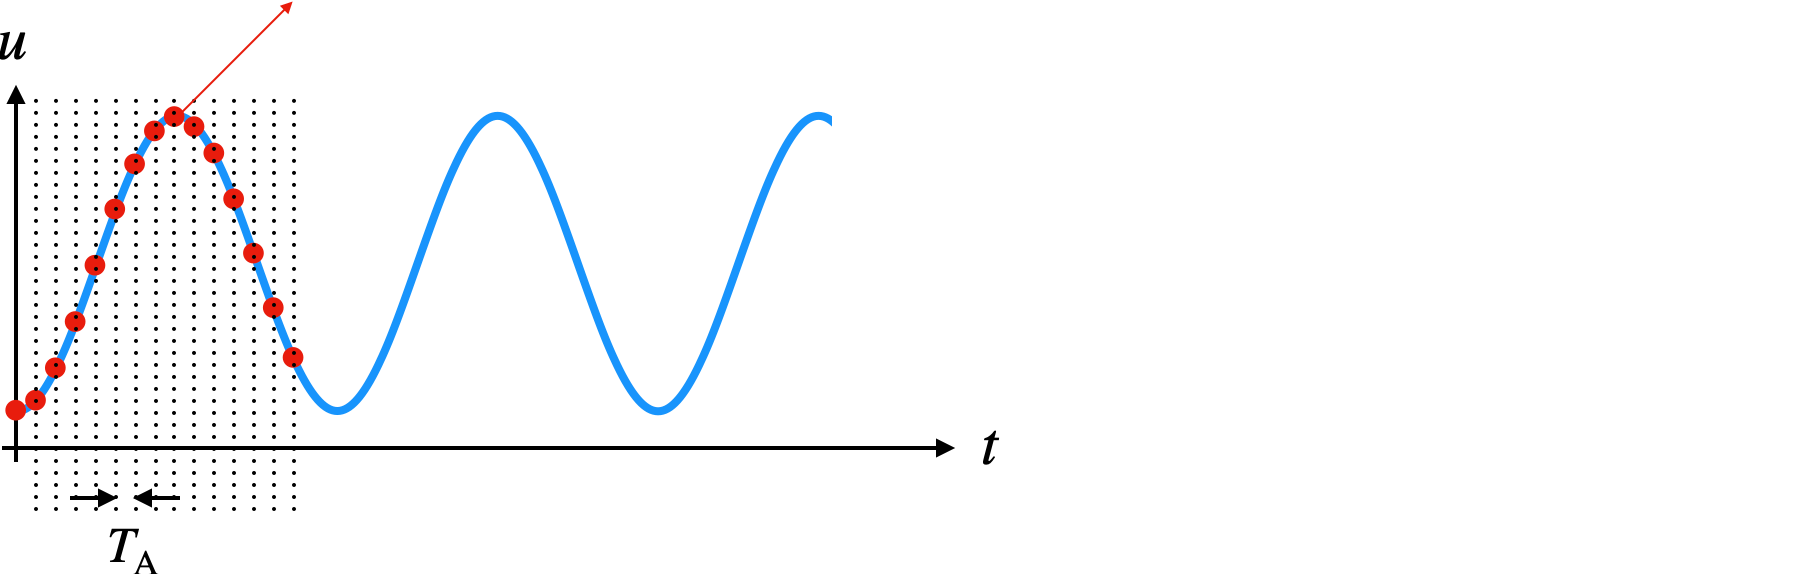

In [10]:
Image("pictures/digital_eff.png", width=800)

#### Beispiele von Kenngrößen für Sinusschwingungen
<a id="SubsubSec-Kenngrößen_bsp_sinus"></a>

Beispiel eines Sinussignals mit und ohne Gleichanteil ist im folgenden Bild einmal dargestellt. Für beide Fälle wurden die Integrale von oben gelöst und aus den entsprechenden Ergebnissen die Formeln für Scheitelfaktor und Formfaktor abgeleitet.

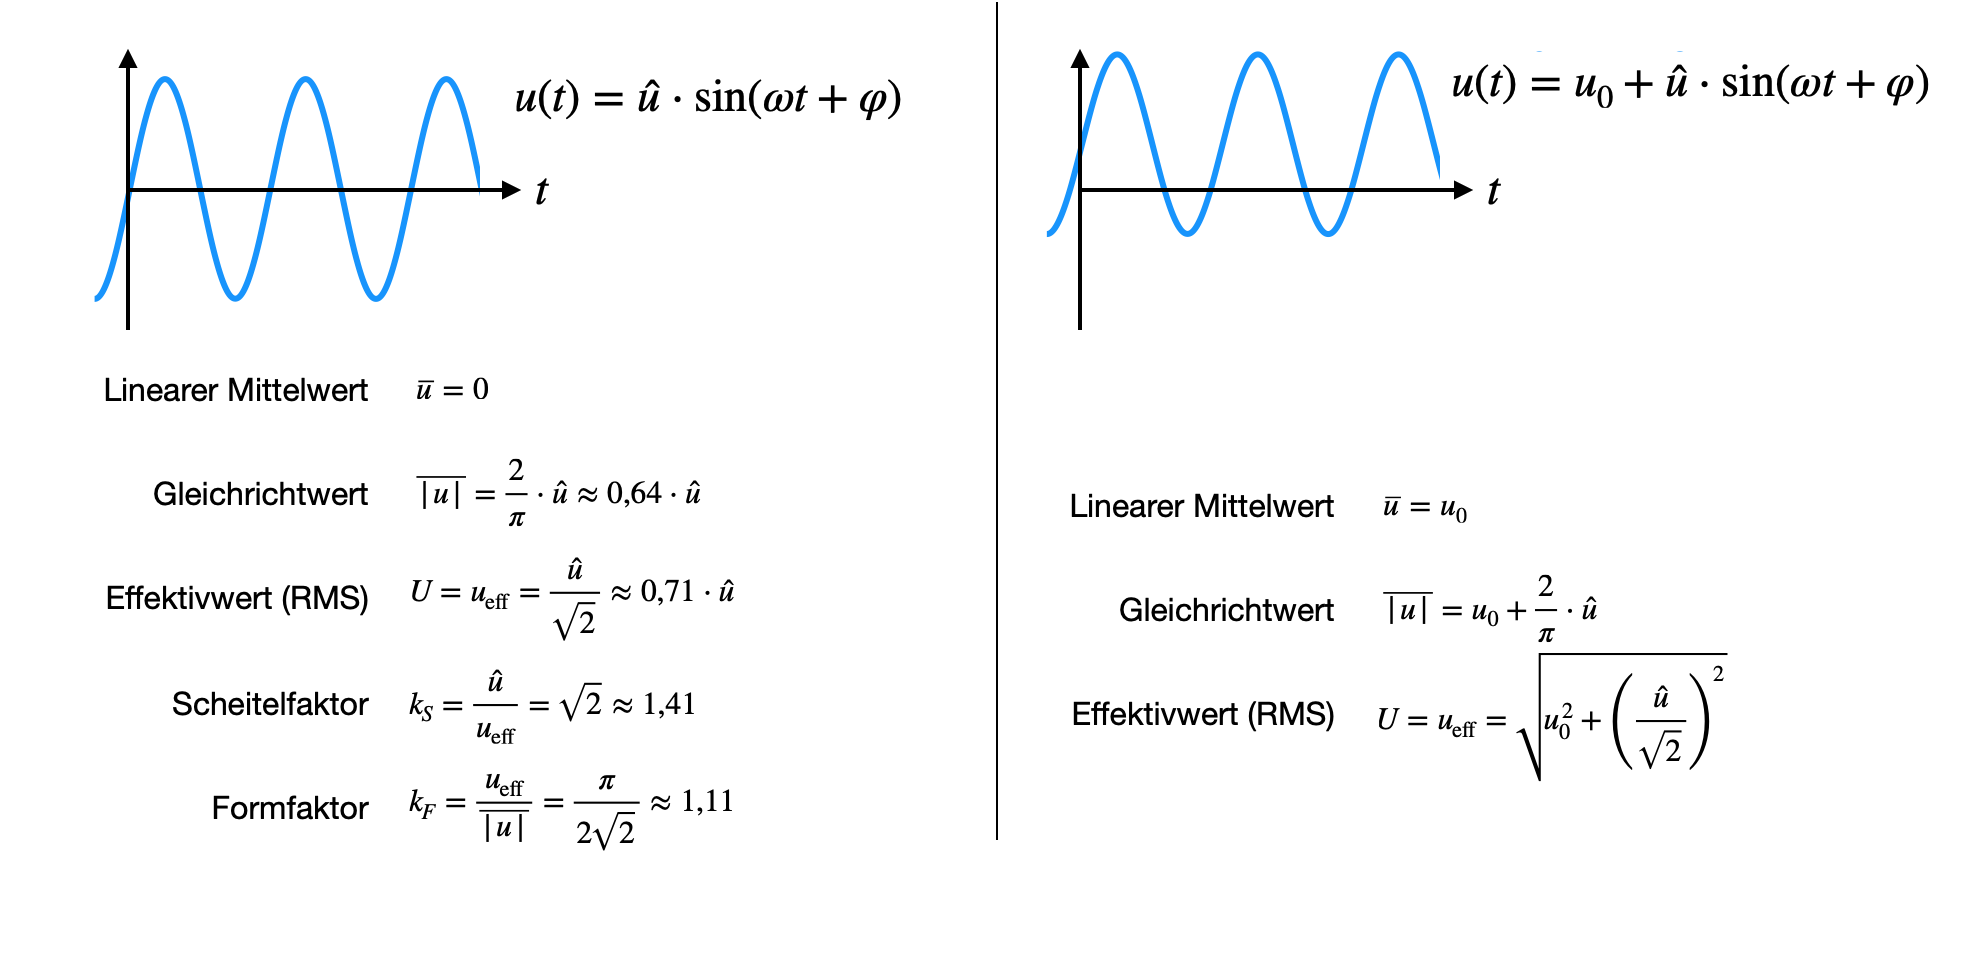

In [11]:
Image("pictures/bsp_eff_sin.png", width=800)

Die Angabe von Scheitel- und Formfaktor haben für Signale mit Gleichanteil keine größere Bedeutung und müssen nicht berechnet werden. Im Vergleich der beiden Beispiele zeigt sich, dass der Effektivwert eines Sinussignals mit Gleichanteil der quadratische Mittelwert der Effektivwerte des Gleichanteils und dem Wert des Gleichanteils $u_0$ entspricht. 

#### Beispiele von Kenngrößen für Pulsweitenmodulation
<a id="SubsubSec-Kenngrößen_bsp_puls"></a>

Ein weiteres Beispiel ist für eine Pulsweitenmodulation berechnet und die Formeln können aus folgendem Bild abgelesen werden. Er handelt sich um ein unsymmetrisches Rechtecksignal. In diesem Fall sprechen wir von einem Pulsweitenmodulierten Signal, da die 'An'-Zeit innerhalb einer bestimmten Anwendung nicht immer gleich groß sein muss. Das Verhältnis 

$$\tau = \frac{\Delta t}{T}$$

wird auch Tastverhältnis genannt. Hierüber kann ein Messwert analog codiert und übertragen werden, während das Signal selber digital ist.

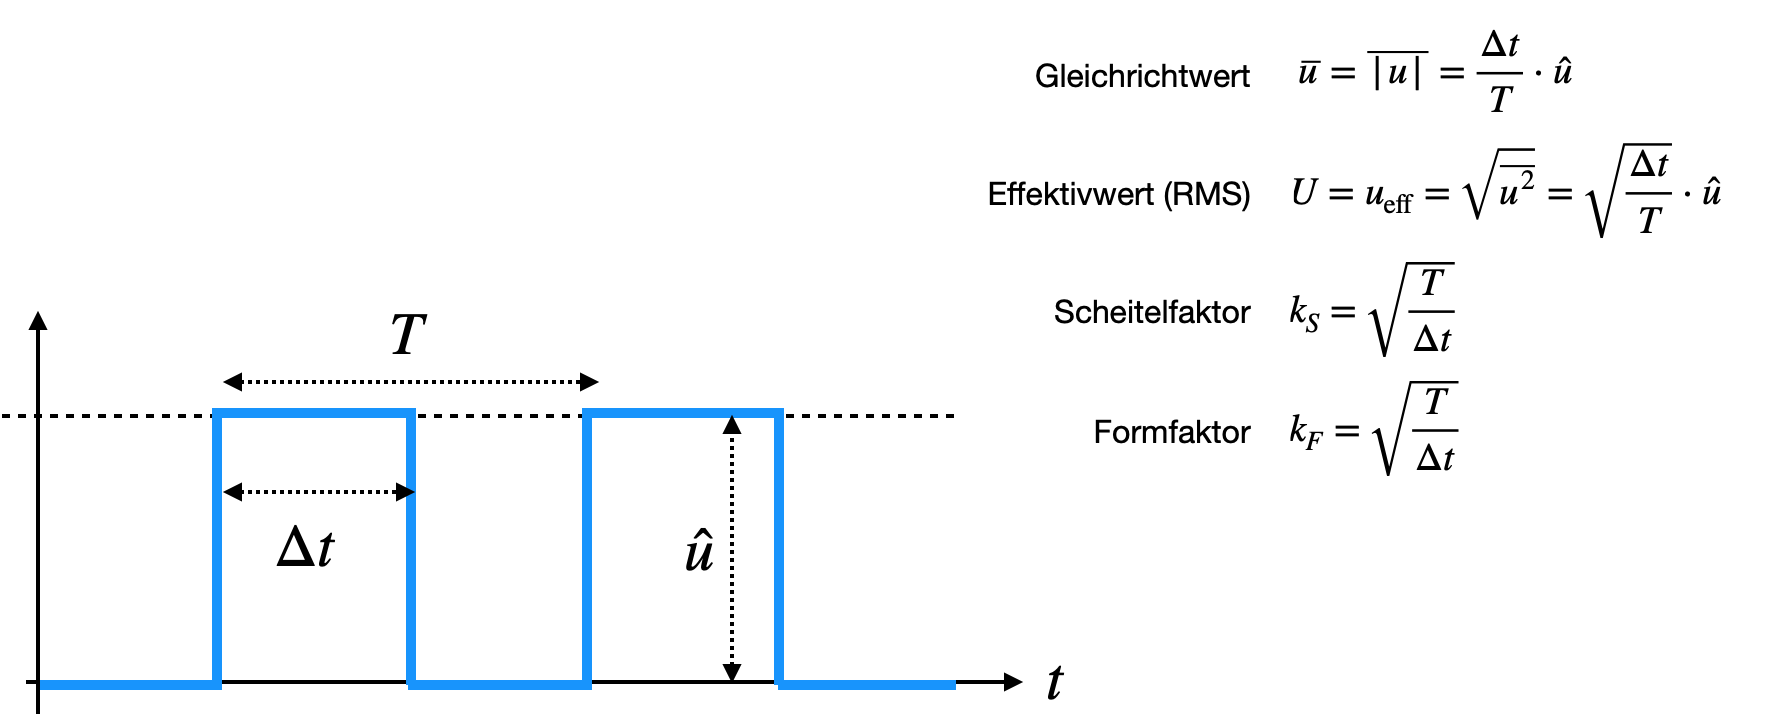

In [12]:
Image("pictures/bsp_eff_puls.png", width=800)

## Fourrierreihen 
<a id="Sec-Fourierreihe"></a>

Jeder periodische Signal kann als Summe von Sinus- und Cosinusfunktionen mit Frequenzen von ganzzahligen Vielfachen der Grundfrequenz des Signals beschrieben werden. Dies ist die sogenannten **Fourierreihe**, Fourierreihen-Entwicklung/oder -Zerlegung. Die **reelle Darstellung der Fourierreihe** sieht wiefolgt aus:

$$x(t) = x_0 + \sum_{k=1}^{\infty} a_k \cos(2\pi k f_0 t) + \sum_{k=1}^{\infty} b_k \sin(2\pi k f_0 t)$$

$x_0$ ist hierbei der Gleichanteil (Mittelwert) des Signals, der sich wieder über den arithmetischen Mittelwert berechnet:

$$x_0 = \frac{1}{T} \int_{-T/2}^{T/2} x(t) dt = \frac{a_0}{2}$$

Die (reellen) Koeffizienten $a_k$ und $b_k$ nehmen für jedes Messsignal eine anderen Wert an und berechnen sich über:

$$a_k = \frac{2}{T}  \int_{-T/2}^{T/2} x(t) \cos(2\pi k f_0 t) dt $$

und 

$$b_k = \frac{2}{T}  \int_{-T/2}^{T/2} x(t) \sin(2\pi k f_0 t) dt$$

Jedes Integral muss immer über eine Periode ausgeführt werden. Ob hier die Grenzen $\pm T/2$ gewählt werden, oder von 0 bis $T$ integriert wird, ist jedem selber überlassen. 

Es kann übrigens folgendes gezeigt werden, was für die Praxis oft sehr hilfreich ist, da es die Anzahl von Integralberechnungen reduziert:

* für **gerade** Funktionen, also wenn $x(t) = x(-t)$ gilt, dann sind alle $b_k = 0$ (es existieren nur noch Cosinus-Terme)
* für **ungerade** Funktionen, also wenn $x(t) = -x(-t)$ gilt, dann sind alle $a_k = 0$ (es existieren nur noch Sinus-Terme)
* einen Gleichanteil $x_0$ kann es folglich bei ungeraden FUnktionen *nicht* geben. 

Eine alternative Schreibweise ist die **komplexe Darstellung**. 

$$x(t) = \sum_{k=-\infty}^{\infty} \underline{c}_k \mathrm e^{j 2\pi k f_0 t}$$

Diese liefert den Vorteil, dass nur eine Art von Koeffizienten berechnet werden muss:

$$\underline {c}_k = \frac{1}{T}  \int_{-T/2}^{T/2} x(t) \mathrm e^{- j 2\pi k f_0 t} dt $$

Trotz der Rechnung mit komplexen Funktionen, anstelle von reellen Sinus- und Cosinus-Termen, handelt es sich immer noch um eine reelle Funktion. Für $k=0$ erhält man wieder den Gleichanteilm d.h.:

$$\underline c_0 = x_0$$

Außerdem sieht man, dass die Werte für $\underline {c}_{-k}$ und $\underline {c}_k$ zueinander komplex konjugiert sind:

$$\underline {c}_{-k} = \underline {c}_k^*$$

Mittels der Euler-Formel

$$e^{j\omega t} = \cos(\omega t) + j \sin(\omega t)$$

lassen sich die Koeffizienten aus reeller Fourierreihen-Entwicklung und komplexer Darstellung ineinander umformen. Durch die Addition eines zueinander komplex konjugierten Koeffizientenpaares lässt sich der reelle Koeffizient $a_k$ bestimmen:

$$a_k = \underline{c}_{k} + \underline{c}_{-k}$$

und analog fällt bei der Subtraktion der Realteil weg, sodass nach zusätzliche Multiplikation mit $j$ $b_k$ berechnet wird:

$$b_k = j (\underline{c}_{k} - \underline{c}_{-k})$$

Andersherum können aus den reellen Koeffizienten auch die komplexen Koeffizienten berechnet werden:

$$\underline c_k = \frac{1}{2} (a_k - j b_k)$$

$$\underline c_{-k} = \frac{1}{2} (a_k + j b_k) = \underline c_k^*$$

An dieser Stelle wollen wir noch mal festhalten, dass die Koeffizienten der Fourierreihe eine Schwingung oder ein Messsignal im Frequenzbereich eindeutig beschreibt. In Ihrer Gesamtheit stellen diese Koeffizienten das **Spektrum** des Signals dar. Dies ist zumindest wahr für die hier dargestellte mathematische Betrachtung mittels Fourier-Transformation. Ein Spektrumanalysator wertet hingegen bei der jeder Einzelmessung in einem begrenzten Bereich Frequenzbereich das Signal aus, was häufig noch durch einen Bandpassfilter geschleust wurde. Dabei gehen Informationen über die Phasenlage verloren. 

### Beispiel Fourierreihe eines Rechteckpuls 
<a id="SubSec-Bsp_Fourier_rechteck"></a>

Gucken wir uns im folgenden Code-Block mal einige Überlagerungen von Sinusschwingungen und wie dieser zum Rechteckpuls, der Signumsfumktion, führen.

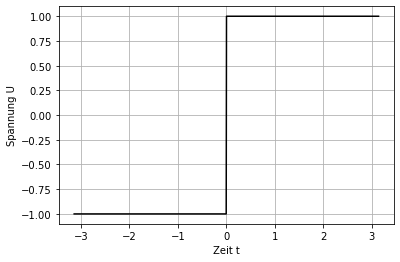

In [13]:
# Defintion der Rechteckfunktion
def rechteck(x):
    out = 0
    if x<0:
        out = -1
    if x>0:
        out = 1
    return out
sig = []   
x = np.linspace(-np.pi, np.pi, 1000)
for i in x:
    sig.append(rechteck(i))

plt.plot(x,sig, 'k')
plt.grid()
plt.xlabel('Zeit t')
plt.ylabel('Spannung U')
plt.show()

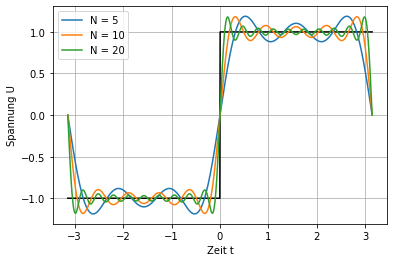

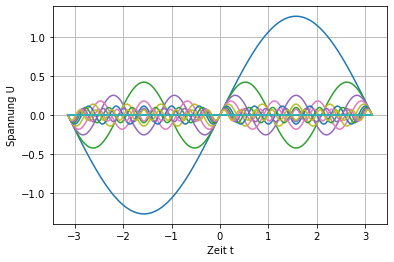

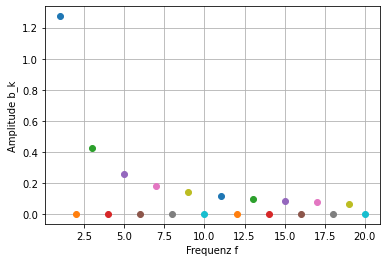

In [14]:
# Berechnung der Fourier-Koeffizienten für diesen Rechteckpuls

# Da die Funktion gerade ist sind alle Koeffzienten a_k = 0

# Berechnung der b_k:
def b(k):
    return 2/np.pi * (-1/k * np.cos(np.pi*k) + 1/k)

def fourier_reihe_rechteck(N,x):
    out = 0
    for i in range(1,N+1):
        out = out + b(i) * np.sin(i*x)
    return out

plt.plot(x,sig, 'k')
n = 5
plt.plot(x,fourier_reihe_rechteck(n,x), label = 'N = %d'%(n))
n = 10
plt.plot(x,fourier_reihe_rechteck(n,x), label = 'N = %d'%(n))
n = 20
plt.plot(x,fourier_reihe_rechteck(n,x), label = 'N = %d'%(n))
plt.grid()
plt.legend()
plt.xlabel('Zeit t')
plt.ylabel('Spannung U')
plt.show()

for i in range(1,n+1):
    plt.plot(x, b(i) * np.sin(i*x))
plt.grid()
plt.xlabel('Zeit t')
plt.ylabel('Spannung U')
plt.show()

for i in range(1,n+1):
    plt.plot(i, b(i),'o')
plt.grid()
plt.xlabel('Frequenz f')
plt.ylabel('Amplitude b_k')
plt.show()

## Fourier-Transformation 
<a id="Sec-FFT"></a>

Die Fourier-Transformation ist Teil der Spektralanalyse in der Messtechnik. Sie basiert auf der Grundidee, dass, wie wir eben gesehen haben, sich jede periodische Funktion aus Sinus- und Cosinusfunktionen schreiben lässt. Das Ziel ist es, die Anteile dieser Schwingungen sichtbar zu machen. Die Fourier-Transformation ist eine mathematische Methode mit der nun auch aperiodische Signale in ein kontinuierliches Spektrum zerlegt werden. 

Die **diskrete Fourier-Transformation** (z.B. auf digitalisierte, abgetastete Messwerte angewendet) entspricht der Fourierreihen:

$$X_\mathrm d (k \Delta f) = \sum_{i = 0}^{N-1} x(i\Delta t) \mathrm e^{-j 2\pi  k \Delta f i \Delta t}$$

wobei $\Delta f = 1/T$ mit der Periode $T = N\cdot \Delta T$, $N$ ist die Anzahl der Samples. 

Die **kontinuierliche Fourier-Transformation** ist für beliebige Funktionen $f(t)$ definiert, d.h. die Periode kann unendlich lang werden und die Funktion kann aperiodisches Verhalten aufweisen:

$$\mathcal F(x(t)) = X(j\omega) = \int_{-\infty}^{\infty} x(t) \mathrm e^{-j \omega t} dt$$

Die Rücktransformation ist wiefolgt definiert: 

$$x(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty} X(j\omega) \mathrm e^{j \omega t} d\omega$$

Der Vollständigkeitshalber soll an dieser Stelle auch noch die **Laplace-Transformation** erwähnt werden, die sich wiefolgt berechnen lässt:

$$\mathcal L(x(t)) = X(s) = \int_{0}^{\infty} x(t) \mathrm e^{-st} dt$$

mit der Rücktransformation

$$x(t) = \frac{1}{2\pi}\int_{0}^{\infty} X(s) \mathrm e^{st} ds$$

Hierbei ist $s= \sigma + j\omega$ eine komplexe Zahl (anstelle von $\omega$) und wird für dynamische Messsysteme wichtig werden.  

### Eigenschaften
<a id="SubSec-Eigenschaften_FFT"></a>

Jeder Fourier-Transformation hat folgende wichtige **Eigenschaften**, die das Leben und Rechnen im Frequenzraum erheblich erleichtern können:

* **Linearität**: $\mathcal F(ax_1 + bx_2) = a\mathcal F(x_1)+ b \mathcal F(x_2)$
* **Ableitung**: $\mathcal F(\dot x) = j\omega \cdot \mathcal F(x)$
* **Faltung**:$ \mathcal F(x_1*x_2) = \mathcal F(x_1) \cdot \mathcal F(x_1)$
    * Faltung im Zeichbereich ist zum Vergleich sehr kompliziert: $(x_1 \ast x_2)(t) = \int_{-\infty}^{\infty} x_1(\tau)x_2(t-\tau) \mathrm{d}\tau$
* **Zeitverschiebung**: $\mathcal F(x(t-\tau)) = \mathcal F(x(t)) \cdot \mathrm e^{-j\omega \tau}$

### Anwendung
<a id="SubSec-Anwendung_FFT"></a>

Ein Spektralanalyse, wie sie die Fouriertransformation durchführt, eigenet sich besonders gut zur Zustandüberwachung. Hier können Motoren, Turbinen, Sägen, Kugellager uvm, im Prinzip alles was rotiert, überwacht werden. Die spezifischen Frequenz jedes Kugellagers kann beispielsweise überwacht werden. Sollte sich die Amplitude über die Zeit verändert, kann dies ein Indiz dafür sein, dass eine Kugel ins Lager gefallen ist oder das Lager einen Schaden bekommen hat. Verschlechtert sich das Verhalten kann frühzeitig gegengewirkt werden, indem das Kugellager ausgetauscht wird. Das heißt auch Fehlerfrüherkennung, Fehlerdiagnose und Trendanalysen ("predictive maintenance") werden häufig im Frequenzraum durchgeführt. 

## Zusammenfassung
<a id="Sec-Zusammenfassung"></a>

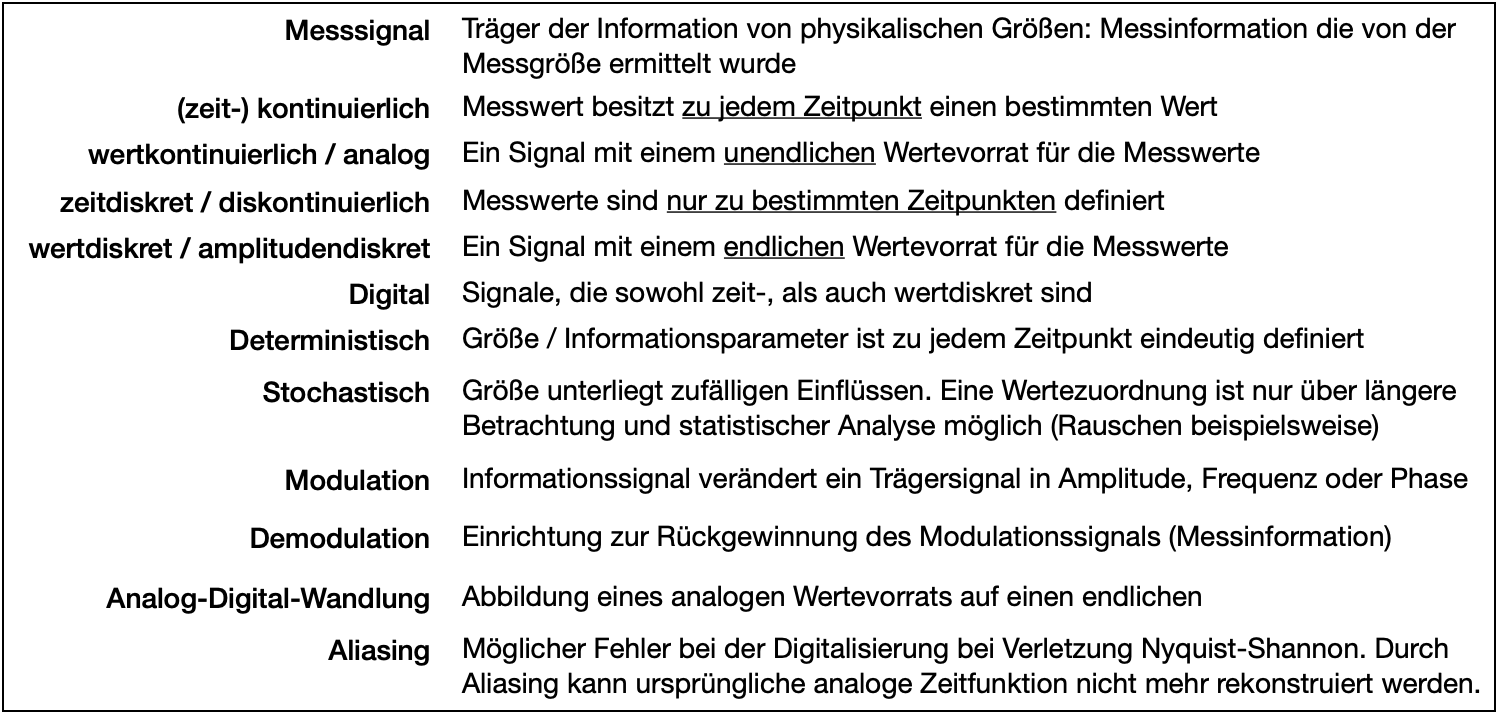

In [15]:
Image("pictures/zusammenfassung_5-1.png", width=800)

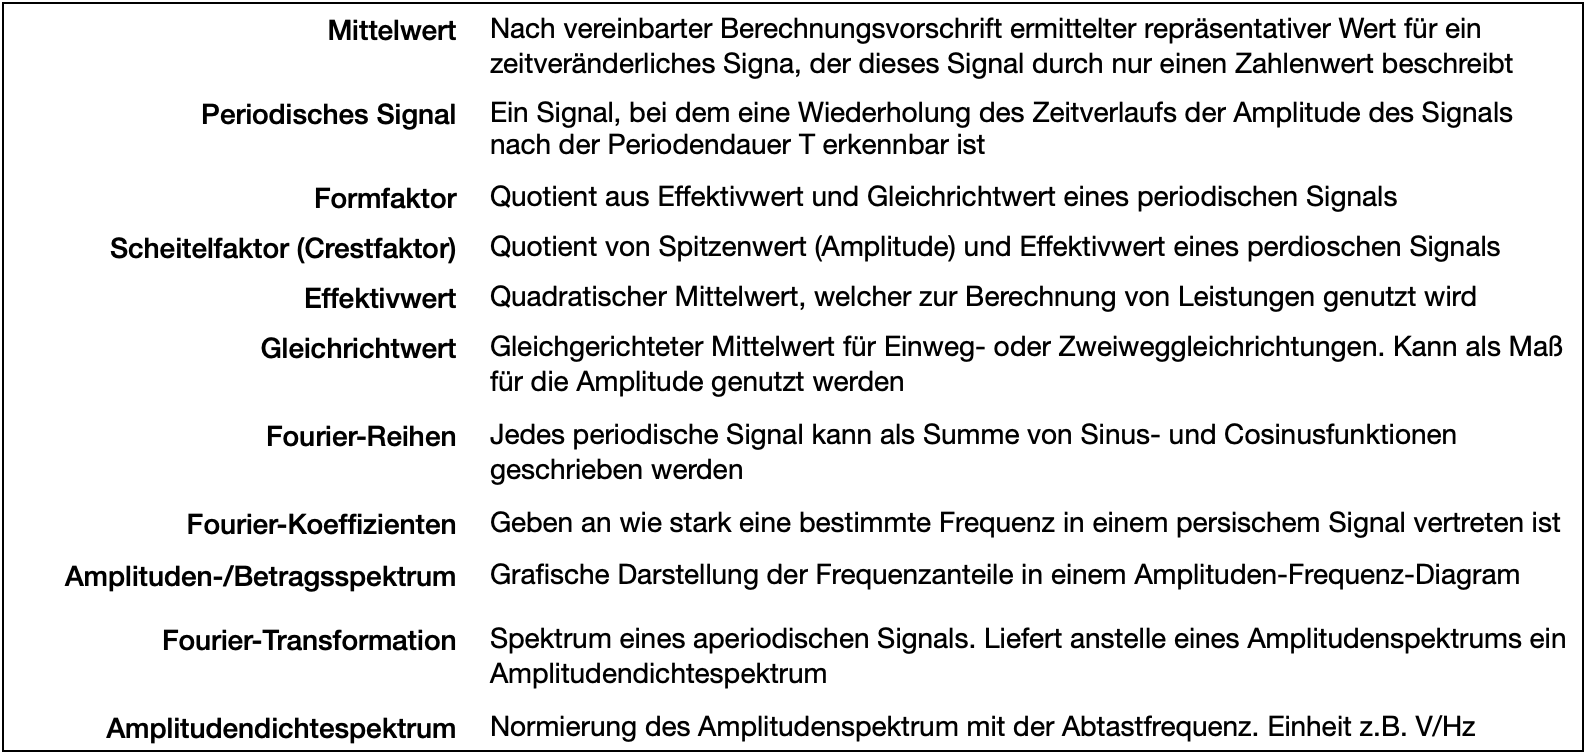

In [16]:
Image("pictures/zusammenfassung_5-2.png", width=800)